**PRML Project 1**

Part 1 - PCA

In [0]:
!pip install imageio
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.1)


In [0]:
import numpy as np
import os
import sys
import datetime
import skimage.color,skimage.io
import matplotlib.colors as pltc
from sklearn.preprocessing import StandardScaler

In [0]:
#default imports from project
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import imageio
import math
import tensorflow as tf
log = lambda *args: print(datetime.datetime.now().strftime('%H:%M:%S'), ':', *args)

In [0]:
#mount googledrive and load data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#extract data from drive zip files
import zipfile
data = zipfile.ZipFile('gdrive/My Drive/Colab Notebooks/images.zip', 'r')
data.extractall()
data_2 = zipfile.ZipFile('gdrive/My Drive/Colab Notebooks/landmarks.zip', 'r')
data_2.extractall()

In [0]:
#load images into python
def load_images_from_folder(folder):
    images = []
    images_all_channels=[]
    i_names=[]
    for filename in sorted(os.listdir(folder)):
        img = skimage.io.imread(os.path.join(folder,filename))
        if img is not None:
            img=skimage.color.rgb2hsv(img)
            img_v=img[:,:,2].flatten()
            images_all_channels.append(img)
            images.append(img_v)
            i_names.append(filename)
    return np.asarray(images,dtype=np.float64),np.asarray(images_all_channels,dtype=np.float64),i_names

dataset,dataset_3d,inames=load_images_from_folder('images')
print(dataset.shape)

(1000, 16384)


In [0]:
#divide into test set and training set
train_set,test_set=dataset[:800],dataset[-200:]
train_set_3d,test_set_3d=dataset_3d[:800],dataset_3d[-200:]

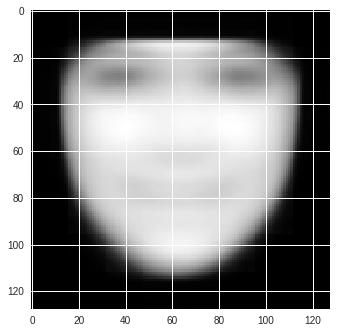

In [0]:
#mean face
mean_face=train_set.mean(axis=0)
plt.imshow(mean_face.reshape(128,128),cmap='gray')

In [0]:
#PCA implementation
def myPCA(dataset):
  x=dataset-mean_face
  cov_x=np.matmul(x,x.T)
  eig_val,eig_v=np.linalg.eigh(cov_x)
  eig_v=np.matmul(eig_v,x)
  return eig_val,eig_v
#eig_val,eig_v=myPCA(train_set)
#print(eig_v.shape)

In [0]:
#sklearn PCA
from sklearn.decomposition import PCA

def sklearnPCA(dataset,mean_face,components):
  x=dataset-mean_face
  #pca = PCA(n_components=components)
  pca=PCA(0.97)
  transformed_x=pca.fit_transform(x)
  return pca,transformed_x

In [0]:
pca,new_x=sklearnPCA(train_set,mean_face,50)
print(pca.components_.shape)
eig_v=pca.components_
eigen_v=eig_v[0:50]
print(eigen_v.shape)

(274, 16384)
(50, 16384)


In [0]:
# var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# plt.ylabel('% Variance Explained')
# plt.xlabel('# of Features')
# plt.title('PCA Analysis')
# plt.ylim(30,100.5)
# plt.plot(var)

In [0]:
def plot_filter_grid(units,n_columns = 5):
    filters = units.shape[0]
    plt.figure(1, figsize=(16,16))
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.axis('off')
        plt.imshow(units[i].reshape(128,128))

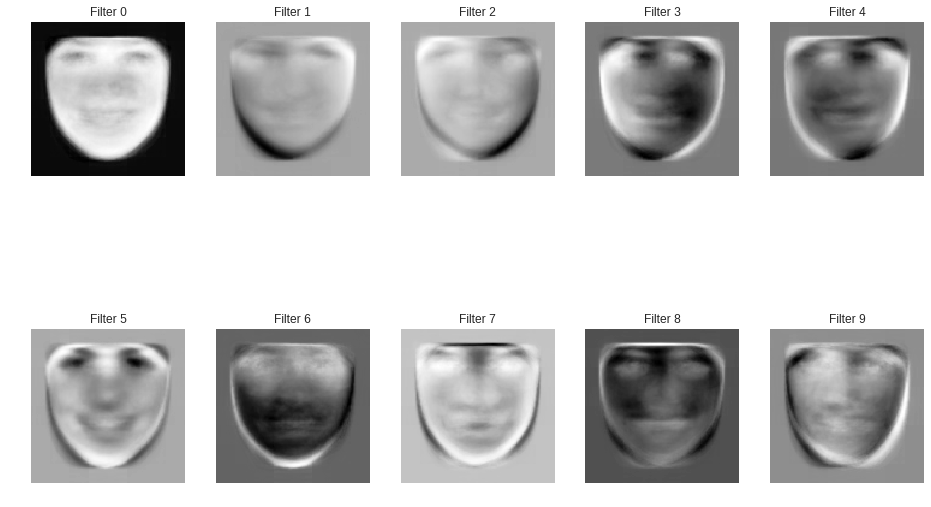

In [0]:
#1.1
#print eigenfaces
plot_filter_grid(eigen_v[0:10])

In [0]:
#1.2
#reconstucting faces
def reconstructFace(oldFace,eigv,mean_face=mean_face):  
  oldFace=oldFace-mean_face
  new_face=np.zeros(oldFace.shape,dtype=np.float64)
  np.copyto(new_face,mean_face)
  #print(n_eigv)
  for i in range(0,eigv.shape[0]):
    w=np.dot(oldFace, eigen_v[i])
    new_face=new_face+(eigen_v[i]*w)
  return new_face

In [0]:
def reconstructFace3D(old_hsv,old_v,eigv,mean_face=mean_face):
  v=reconstructFace(old_v,eigv,mean_face)
  new_hsv=np.zeros(old_hsv.shape,dtype=np.float64)
  np.copyto(new_hsv,old_hsv)
  new_hsv=new_hsv.reshape(128*128,3)
  new_hsv.reshape(128*128,3)[:,2]=v
  return new_hsv.reshape(128,128,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

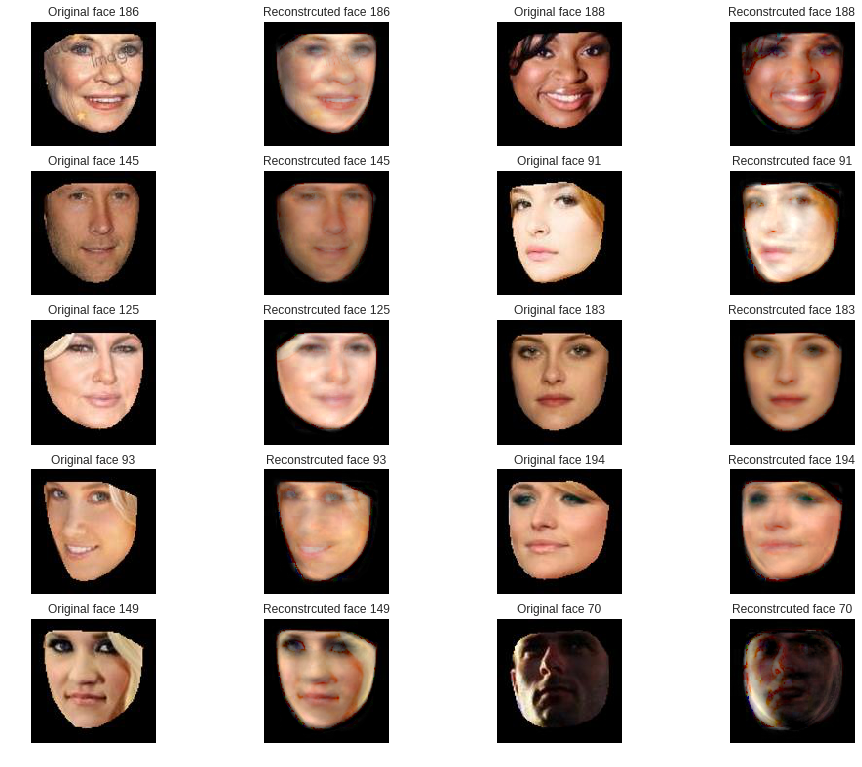

In [0]:
def plot_faces_grid(n_faces,n_eig):
    n_columns=4
    plt.figure(1, figsize=(16,16))
    n_rows = math.ceil(n_faces*2 / n_columns) + 1
    j=0
    for i,val in enumerate(np.random.randint(0,199,n_faces)):
        plt.subplot(n_rows, n_columns, j+1)
        plt.title('Original face ' + str(val+1))
        plt.axis('off')
        plt.imshow((skimage.color.hsv2rgb(test_set_3d[val])*255).astype(np.uint8))
        plt.subplot(n_rows, n_columns, j+2)
        plt.title('Reconstrcuted face ' + str(val+1))
        plt.axis('off')
        new3D=reconstructFace3D(test_set_3d[val],test_set[val],eigen_v)
        plt.imshow(skimage.color.hsv2rgb(new3D))
        j+=2
plot_faces_grid(10,50)

In [0]:
#1.1.3 Calculate and display error
def reconstructFaces(input_set,eigen_v):
  res_set=np.zeros(input_set.shape)
  for i in range(input_set.shape[0]):
    res_set[i]=reconstructFace(input_set[i],eigen_v)
  return res_set

def calculate_pca_err(fn,fn_set,fn_vectors):
  x=[1,5,10,15,20,25,30,35,40,45,50]
  err=np.zeros(11)
  for i,val in enumerate(x):
    err[i]=((fn_set-fn(fn_set,fn_vectors[:val]))**2).mean(axis=0).mean()
  return x,err

Text(0, 0.5, 'reconstruction error(MSE)')

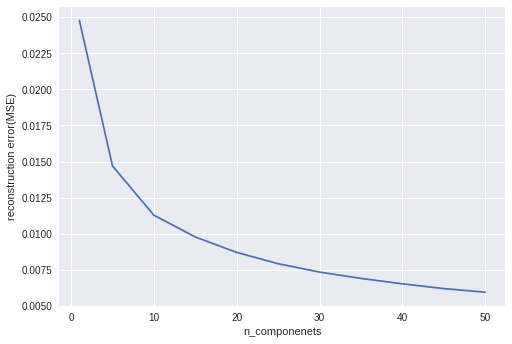

In [0]:
err_x,err_unwarped=calculate_pca_err(reconstructFaces,test_set,eigen_v)
plt.plot(err_x,err_unwarped)
plt.xlabel('n_componenets')
plt.ylabel('reconstruction error(MSE)')

In [0]:
import scipy.io
def load_landmarks_from_folder(folder):
    images = []
    lnames=[]
    for filename in sorted(os.listdir(folder)):
        img = scipy.io.loadmat(os.path.join(folder,filename))
        if img is not None:
            images.append(img['lms'].flatten())
            lnames.append(filename)
    return np.array(images),lnames

l_dataset,lnames=load_landmarks_from_folder('landmarks')
l_train_set,l_test_set=l_dataset[:800],l_dataset[-200:]
test_l=lnames[-200:]
print(l_dataset.shape)

(1000, 136)


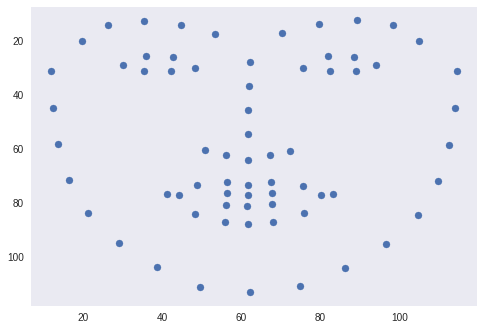

In [0]:
mean_landmarks=l_train_set.mean(axis=0)
plt.gca().invert_yaxis()
plt.grid(False)
plt.scatter(mean_landmarks.reshape(68,2)[:,0],mean_landmarks.reshape(68,2)[:,1])

In [0]:
def landmarkPCA(dataset):
  x=dataset-dataset.mean(axis=0)
  cov_x=np.matmul(x.T,x)
  eig_val,eig_v=np.linalg.eig(cov_x)
  #sort eigen values and vectors
  indexes_eig = eig_val.argsort()[::-1]   
  eig_val = eig_val[indexes_eig]
  eig_v = eig_v[:,indexes_eig]
  eig_val=eig_val/dataset.shape[0]
  return eig_val,eig_v.T
landmark_val,landmark_v=landmarkPCA(l_train_set)

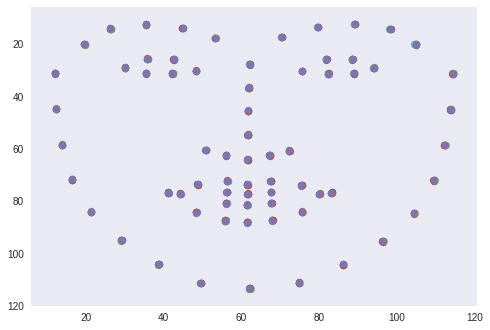

In [0]:
#import itertools
def eigenWarpings(list):
  #colors = itertools.cycle(['.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'])
  plt.gca().invert_yaxis()
  plt.grid(False)
  for i in range(list.shape[0]):
    temp=list[i]+mean_landmarks
    plt.scatter(temp.reshape(68,2)[:,0],temp.reshape(68,2)[:,1])#,marker=next(colors))
eigenWarpings(landmark_v[:10])

In [0]:
#1.2
def reconstructWarping(oldLandmarks,n_eigv):
  oldLandmarks=oldLandmarks-mean_landmarks
  eigen_vector=landmark_v[:min(landmark_v.shape[0],n_eigv)]
# new_landmarks=np.zeros(oldLandmarks.shape,dtype=np.float64)
# np.copyto(new_landmarks,mean_landmarks)
# for i in range(0,min(landmark_v.shape[0],n_eigv)):
#   w=np.dot(oldLandmarks, landmark_v[i])
#   new_landmarks+=(landmark_v[i]*w)
  red_landmarks=np.matmul(oldLandmarks,eigen_vector.T)
  new_landmarks=np.matmul(red_landmarks,eigen_vector)
  new_landmarks+=mean_landmarks
  return new_landmarks

Text(0, 0.5, 'reconstruction error(MSE)')

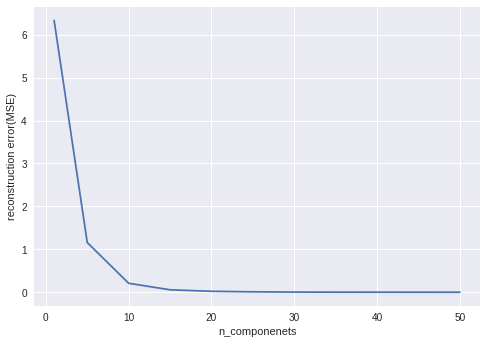

In [0]:
#1.2
def reconstructLandmarks(old,eigv):
  return reconstructWarping(old,eigv.shape[0])
err_x,err_landmarks=calculate_pca_err(reconstructLandmarks,l_test_set,landmark_v)
plt.plot(err_x,err_landmarks)
plt.xlabel('n_componenets')
plt.ylabel('reconstruction error(MSE)')

11.542146753783511 11.797235023041475


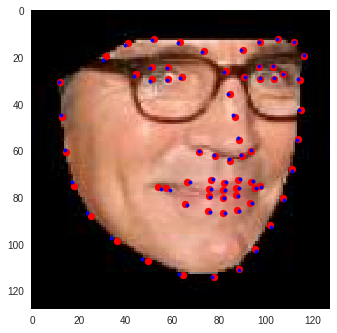

In [0]:
index=26
temp=reconstructWarping(l_test_set[index],10)
plt.gca().invert_yaxis()
plt.grid(False)
plt.imshow(skimage.color.hsv2rgb(test_set_3d[index]))
plt.scatter(l_test_set[index].reshape(68,2)[:,0],l_test_set[index].reshape(68,2)[:,1],color="r",marker="o")
plt.scatter(temp.reshape(68,2)[:,0],temp.reshape(68,2)[:,1],color="b",marker=".")
print(temp[0],l_test_set[index][0])

In [0]:
!cp 'gdrive/My Drive/Colab Notebooks/mywarper.py' mywarper.py
import mywarper

In [0]:
#Align all training set images to the mean landmarks
#1.3
def align_image_set_to_warping(img_set,landmark_set,landmark):
  res_set=np.zeros(img_set.shape)
  for i,img in enumerate(img_set):
    res_set[i]=mywarper.warp(img.reshape(128,128,3),landmark_set[i].reshape(68,2),landmark.reshape(68,2))
  return res_set

train_set_aligned_3d=align_image_set_to_warping(train_set_3d,l_train_set,mean_landmarks)

In [0]:
train_set_aligned=train_set_aligned_3d[:,:,:,2]

In [0]:
train_set_aligned=train_set_aligned.reshape(800,128*128)
train_set_aligned.shape

(800, 16384)

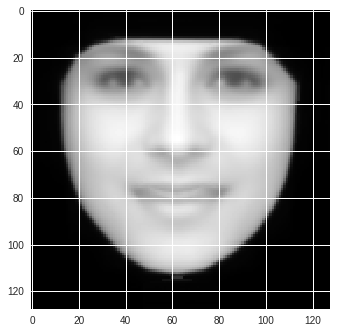

In [0]:
#mean face
mean_face_aligned=train_set_aligned.mean(axis=0)
plt.imshow(mean_face_aligned.reshape(128,128),cmap='gray')

In [0]:
pca_aligned,_=sklearnPCA(train_set_aligned,mean_face_aligned,50)

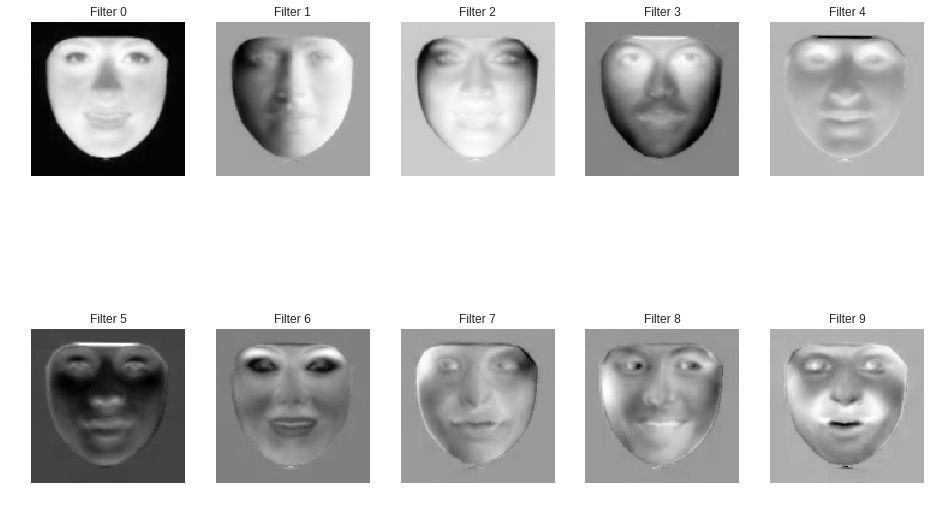

In [0]:
eigen_v_aligned=pca_aligned.components_
eigen_val_aligned=pca_aligned.explained_variance_
plot_filter_grid(eigen_v_aligned[0:10])

In [0]:
def reconstructFaceAligned3D(oldFace3D,oldLandmarks,n_eigv=50,n_eigv_l=10):
  #i. Project landmarks on eigen ladmarks for old face to get landmarks
  new_landmarks=reconstructWarping(oldLandmarks,n_eigv_l)
  #ii. Warp the old face to mean landmarks
  warpedImage=mywarper.warp(oldFace3D,oldLandmarks.reshape(68,2),mean_landmarks.reshape(68,2))
  #iii. Project face onto eigen vectors of aligned faces
  res_face=reconstructFace3D(warpedImage,warpedImage[:,:,2].reshape(128*128),eigen_v_aligned[:n_eigv],mean_face_aligned)
  #iv. Warp old face to landmarks in i.
  return mywarper.warp(res_face,mean_landmarks.reshape(68,2),new_landmarks.reshape(68,2))

In [0]:
def reconstructFaceAligned(oldFace,oldLandmarks,n_eigv=50,n_eigv_l=10):
  #i. Project landmarks on eigen ladmarks for old face to get landmarks
  new_landmarks=reconstructWarping(oldLandmarks,n_eigv_l)
  #ii. Warp the old face to mean landmarks
  warpedImage=mywarper.warp(oldFace.reshape(128,128,1),oldLandmarks.reshape(68,2),mean_landmarks.reshape(68,2))
  #iii. Project face onto eigen vectors of aligned faces
  res_face=reconstructFace(warpedImage.reshape(128*128),eigen_v_aligned[:n_eigv],mean_face_aligned)
  #iv. Warp old face to landmarks in i.
  return mywarper.warp(res_face.reshape(128,128,1),mean_landmarks.reshape(68,2),new_landmarks.reshape(68,2))

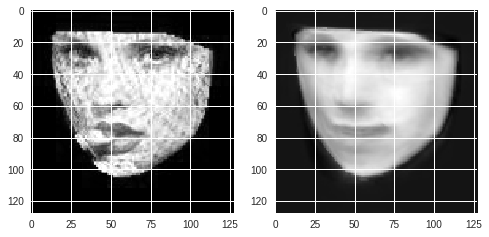

In [0]:
val=18
new3D=reconstructFaceAligned(test_set[val],l_test_set[val],50,10)
plt.subplot(1,2,1)
plt.imshow(test_set[val].reshape(128,128),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(new3D.reshape(128,128),cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


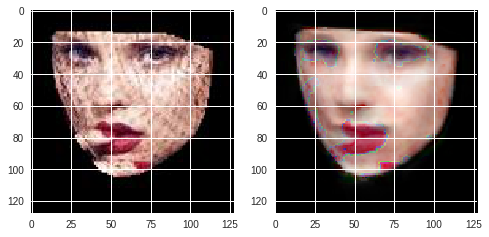

In [0]:
val=18
new3D=reconstructFaceAligned3D(test_set_3d[val],l_test_set[val],50,10)
plt.subplot(1,2,1)
plt.imshow(skimage.color.hsv2rgb(test_set_3d[val]))
plt.subplot(1,2,2)
plt.imshow(skimage.color.hsv2rgb(new3D))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

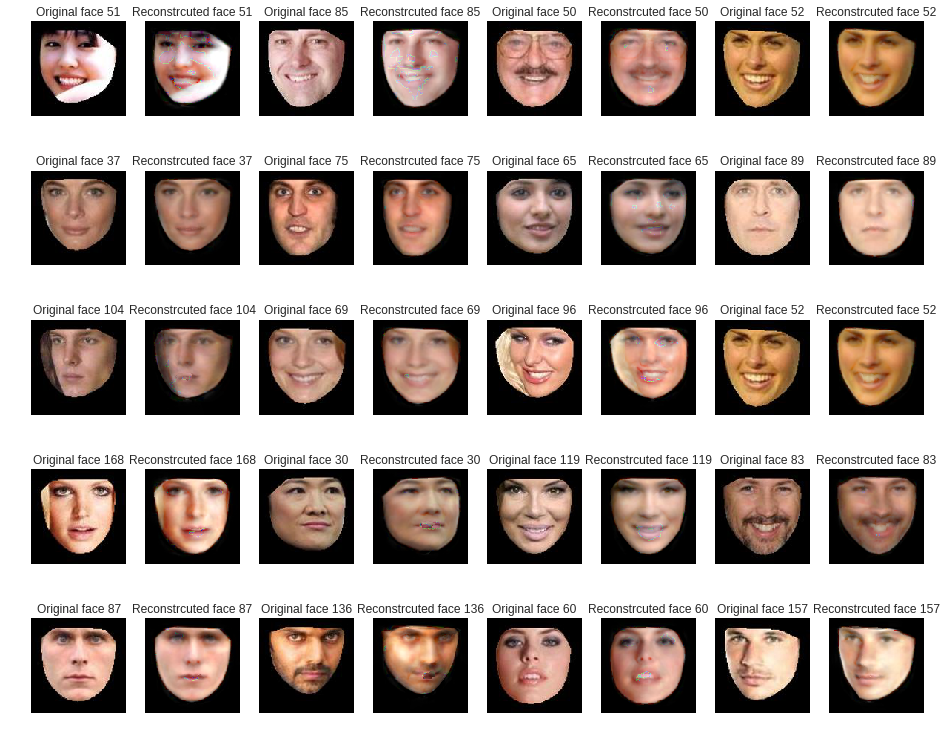

In [0]:
def plot_faces_grid_aligned(n_faces,n_eig,n_eig_l):
    n_columns=8
    plt.figure(1, figsize=(16,16))
    n_rows = math.ceil(n_faces*2 / n_columns) + 1
    j=0
    test_faces_random=np.random.randint(0,200,size=n_faces)
    for i,val in enumerate(test_faces_random):
        plt.subplot(n_rows, n_columns, j+1)
        plt.title('Original face ' + str(val+1))
        plt.axis('off')
        plt.imshow(skimage.color.hsv2rgb(test_set_3d[val]))
        plt.subplot(n_rows, n_columns, j+2)
        plt.title('Reconstrcuted face ' + str(val+1))
        plt.axis('off')
        new3D=reconstructFaceAligned3D(test_set_3d[val],l_test_set[val],n_eig,n_eig_l)
        plt.imshow(skimage.color.hsv2rgb(new3D))
        #print(skimage.color.hsv2rgb(new3D)[0])
        j+=2

plot_faces_grid_aligned(20,50,10)
        

In [0]:
def reconstructPCAWarpFaces(aligned_faces,landmarks,n_eigv,n_eigv_l):
  res_set=np.zeros(aligned_faces.shape)
  for i,img in enumerate(aligned_faces):
    res_set[i]=reconstructFaceAligned(img,landmarks[i],n_eigv,n_eigv_l).flatten()
  return res_set


def calculate_pca_warp_err(fn_set,l_set):
  x=[1,5,10,15,20,25,30,35,40,45,50]
  err=np.zeros(11)
  fn = reconstructPCAWarpFaces
  for i,val in enumerate(x):
    err[i]=((fn_set-fn(fn_set,l_set,val,10))**2).mean(axis=0).mean()
  return x,err

In [0]:
err_x,err_warped=calculate_pca_warp_err(test_set,l_test_set)
plt.plot(err_x,err_warped)
plt.xlabel('n_componenets')
plt.ylabel('reconstruction error(MSE)')

KeyboardInterrupt: ignored

**Part 1.4**

In [0]:
#1.4
def sample_one_face():
  appearance_eig_v,appearance_eig_values=eigen_v_aligned[:50],eigen_val_aligned[:50]
  mean_appearance=mean_face_aligned
  appearance=np.zeros(128*128)
  for i in range(50):
    eig_sample=np.random.normal(0,math.sqrt(appearance_eig_values[i]),1)
    eig_sample_projection=eig_sample*appearance_eig_v[i]
    appearance+=eig_sample_projection
  appearance+=mean_appearance
  plt.imshow(appearance.reshape(128,128),cmap="gray")
  return appearance
#sample_one_face()  

In [0]:
def sample_one_landmark():
  landmarks_eig_v,landmarks_eig_values=landmark_v[:10],landmark_val[:10]
  landmarks=np.zeros([136])
  for i in range(10):
    eig_sample=np.random.normal(0,math.sqrt(landmarks_eig_values[i]),1)
    eig_sample_projection=eig_sample*landmarks_eig_v[i]
    landmarks+=eig_sample_projection
  landmarks+=mean_landmarks
  plt.scatter(landmarks.reshape(68,2)[:,0],landmarks.reshape(68,2)[:,1])
  return landmarks
#sample_one_landmark()

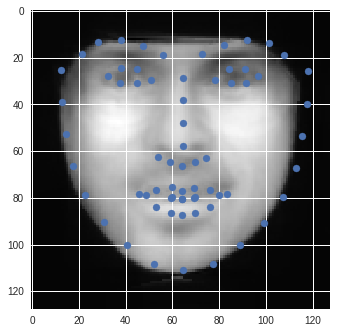

In [0]:
sam_face=sample_one_face()
sam_landmarks=sample_one_landmark()

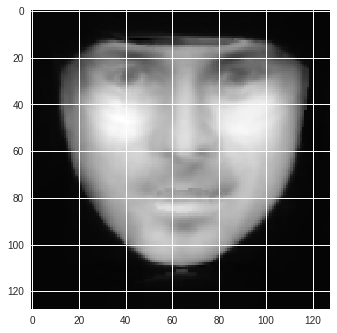

In [0]:
sam_warp=mywarper.warp(sam_face.reshape(128,128,1),mean_landmarks.reshape(68,2),sam_landmarks.reshape(68,2))
plt.imshow(sam_warp.reshape(128,128),cmap="gray")

In [0]:
def sample_appearance(mean_appearance,appearance_eig_v,appearance_eig_values,n_samples):
  n_eig=appearance_eig_v.shape[0]
  appearance_list=np.zeros([n_samples,128*128])
  for i in range(n_eig):
    eig_samples=np.random.normal(0,math.sqrt(appearance_eig_values[i]),n_samples)
    eig_sample_projections=np.matmul(eig_samples.reshape(n_samples,1),appearance_eig_v[i].reshape(128*128,1).T)
    appearance_list+=eig_sample_projections
  appearance_list+=mean_appearance
  return appearance_list

def sample_landmarks(mean_landmarks,landmarks_eig_v,landmarks_eig_values,n_samples):
  n_eig=landmarks_eig_v.shape[0]
  landmarks_list=np.zeros([n_samples,136])
  for i in range(n_eig):
    eig_samples=np.random.normal(0,math.sqrt(landmarks_eig_values[i]),n_samples)
    eig_sample_projections=np.matmul(eig_samples.reshape(n_samples,1),landmarks_eig_v[i].reshape(136,1).T)
    landmarks_list+=eig_sample_projections
  landmarks_list+=mean_landmarks
  return landmarks_list

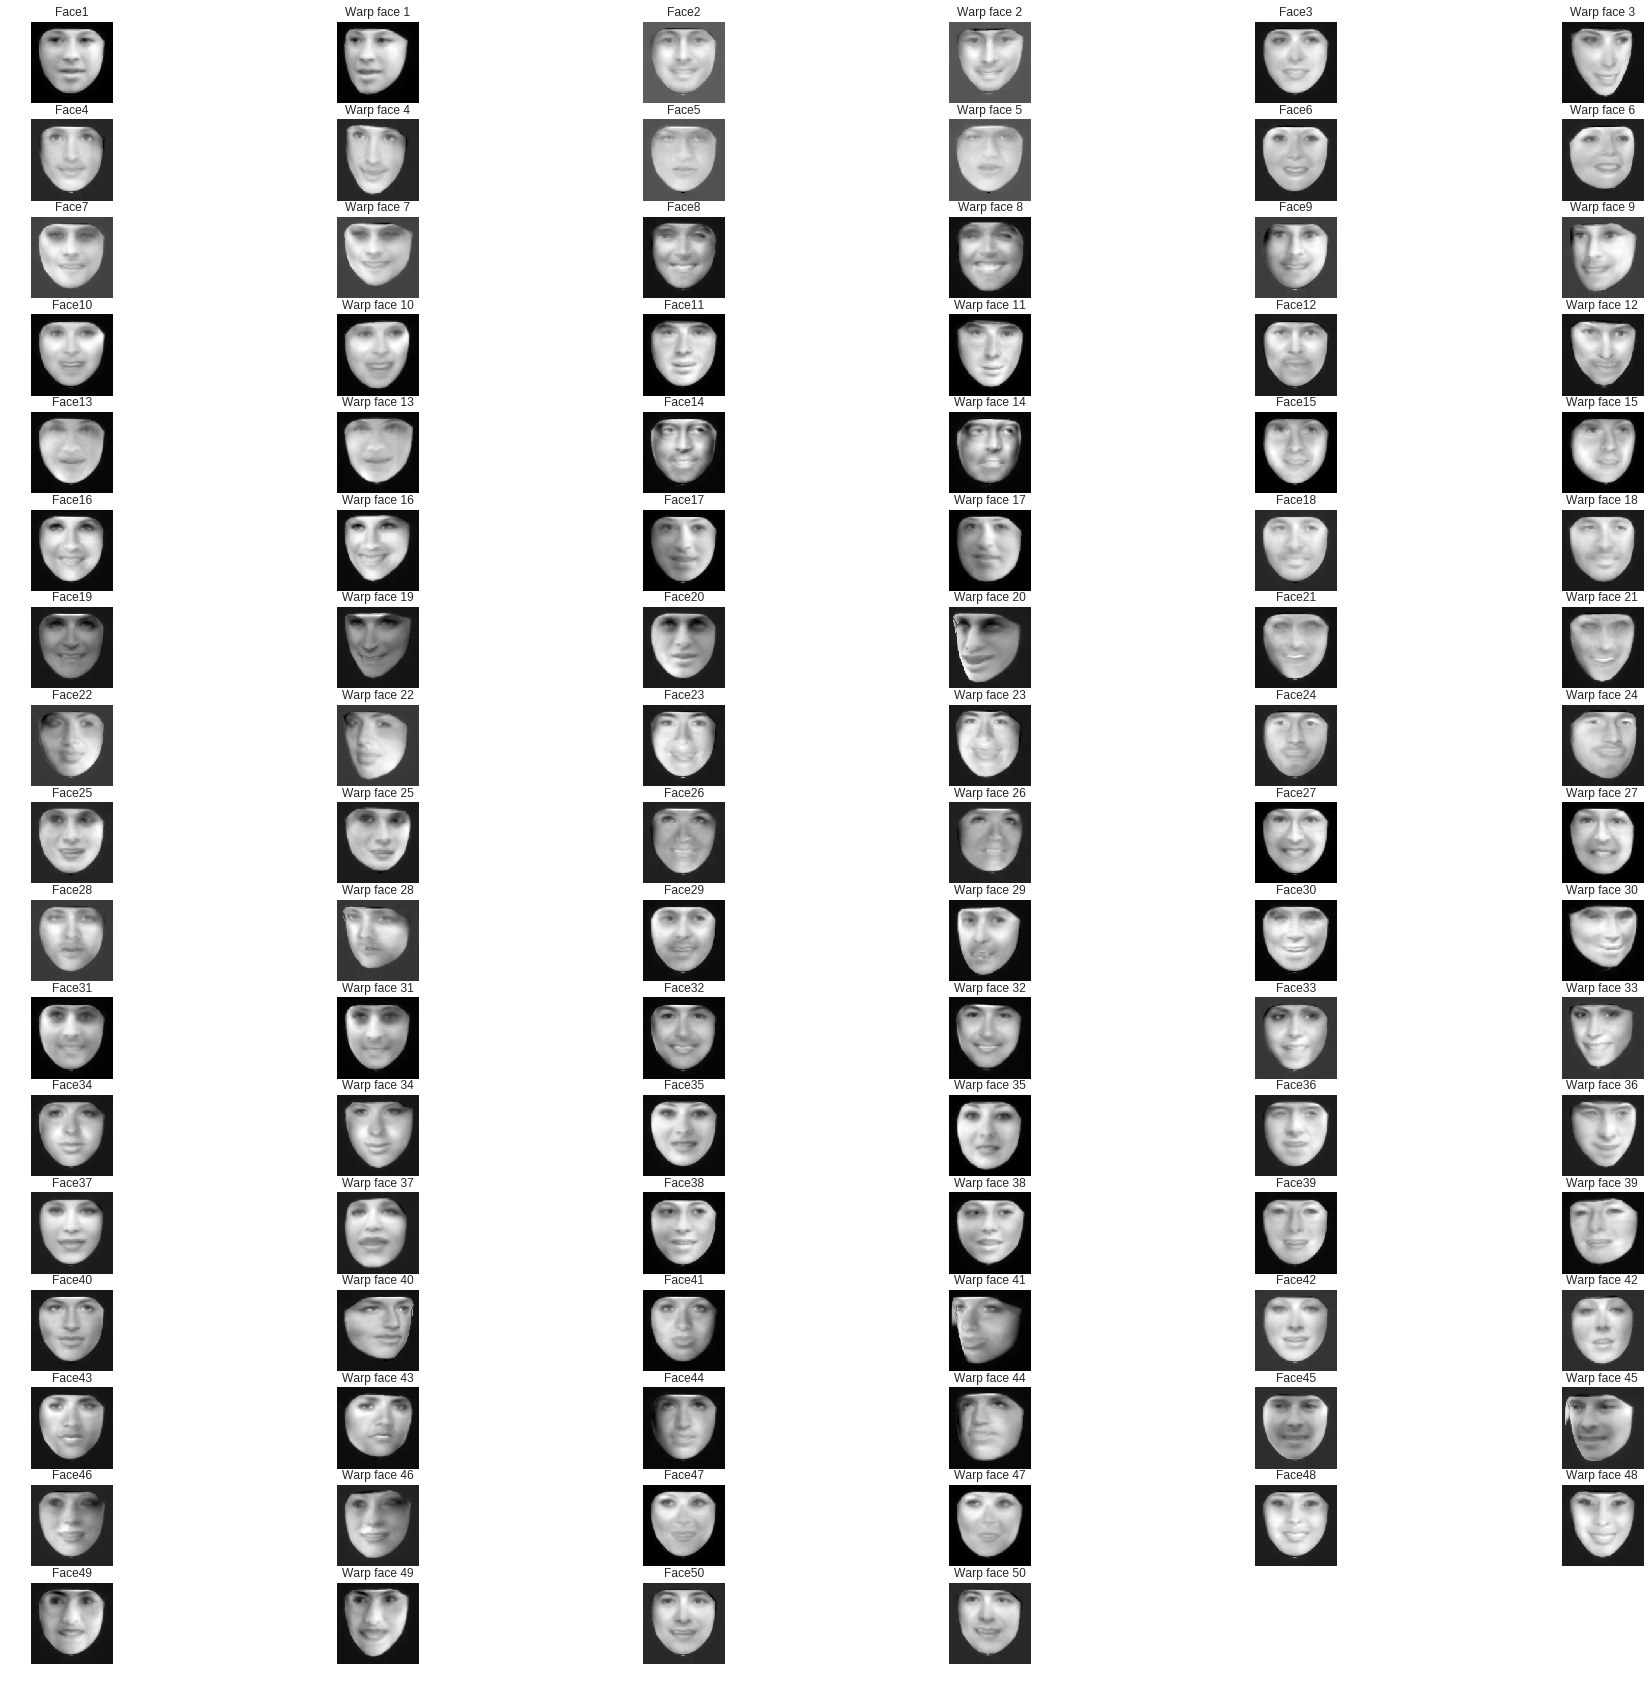

In [0]:
n_columns=10
n_faces=50
s_faces=sample_appearance(mean_face_aligned,eigen_v_aligned[:50],eigen_val_aligned[:50],n_faces)
s_landmarks=sample_landmarks(mean_landmarks,landmark_v[:10],landmark_val[:10],n_faces)
fig=plt.figure(1, figsize=(32,32))

n_rows = math.ceil(n_faces*2 / n_columns) + 1
j=0
for i in range(n_faces):
  plt.subplot(n_rows, n_columns, j+1)
  plt.title('Face' + str(i+1))
  plt.axis('off')
  plt.imshow(s_faces[i].reshape(128,128),cmap="gray")
  plt.subplot(n_rows, n_columns, j+2)
  plt.title('Warp face ' + str(i+1))
  plt.axis('off')
  gen_face=mywarper.warp(s_faces[i].reshape(128,128,1),mean_landmarks.reshape(68,2),s_landmarks[i].reshape(68,2))
  plt.imshow(gen_face.reshape(128,128),cmap="gray")
  j+=2
#   gen_face=mywarper.warp(s_faces[i].reshape(128,128,1),mean_landmarks.reshape(68,2),s_landmarks[i].reshape(68,2))
#   plt.subplot(n_rows, n_columns, i+1)
#   plt.title('Face' + str(i+1))
#   plt.axis('off')
#   plt.imshow(gen_face.reshape(128,128),cmap="gray")
